# Library  

In [ ]:
# Numpy berasal dari kata ‘Numerical Python’, 
# sesuai namanya NumPy berfungsi sebagai library untuk melakukan proses komputasi numerik 
# terutama dalam bentuk array multidimensional (1-Dimensi ataupun 2-Dimensi).

Scipy dibangun untuk bekerja dengan array NumPy dan menyediakan banyak komputasi numerik yang ramah pengguna dan efisien 
seperti rutinitas untuk integrasi, diferensiasi dan optimasi numerik.

Matplotlib merupakan library dari Python yang umum digunakan untuk visualisasi data. 
Matplotlib memiliki kapabilitas untuk membuat visualisasi data 2-dimensional. 
Contoh visualisasi yang dapat dibuat dengan menggunakan matplotlib diantaranya adalah :

Line chart
Bar chart
Pie chart
Box plot chart
Violin chart
Errorbar chart
Scatter chart

 "https://storage.googleapis.com/dqlab-dataset/order.csv".

# Pandas

In [11]:
import pandas as pd
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")


In [12]:
# Shape : informasi jumlah kolom dan jumlah baris data frame
print(order_df.shape)

(49999, 12)


In [14]:
# Head : menampilkan baris awal isi konten, default 5
print(order_df.head(2)) 

# Tail : menampilkan baris akhir isi konten, default 5
print(order_df.tail(2)) 

                           order_id  quantity  \
0  2e7a8482f6fb09756ca50c10d7bfc047         2   
1  2e7a8482f6fb09756ca50c10d7bfc047         1   

                         product_id    price  \
0  f293394c72c9b5fafd7023301fc21fc2  1489000   
1  c1488892604e4ba5cff5b4eb4d595400  1756000   

                          seller_id  freight_value  \
0  1554a68530182680ad5c8b042c3ab563          28000   
1  1554a68530182680ad5c8b042c3ab563          45000   

                        customer_id order_status purchase_date  \
0  08c5351a6aca1c1589a38f244edeee9d      shipped    2016-09-05   
1  08c5351a6aca1c1589a38f244edeee9d      shipped    2016-09-05   

      payment_type product_category_name  product_weight_gram  
0  virtual account               fashion               1800.0  
1  virtual account            automotive               1400.0  
                               order_id  quantity  \
49997  ed98c37d860890f940e2acd83629fdd1         1   
49998  ede4ebbb6e36cbd377eabcc7f5229575        

In [15]:
# Histogram
# bins = jumlah_bins dalam histogram yang akan digunakan. Jika tidak didefinisikan jumlah_bins, maka function akan secara default menentukan jumlah_bins sebanyak 10.
# by = nama kolom di DataFrame untuk di group by. (valuenya berupa nama column di dataframe tersebut).
# alpha = nilai_alpha untuk menentukan opacity dari plot di histogram. (value berupa range 0.0 - 1.0, dimana semakin kecil akan semakin kecil opacity nya)
# figsize = tuple_ukuran_gambar yang digunakan untuk menentukan ukuran dari plot histogram. Contoh: figsize=(10,12)

# plot histogram kolom: price
order_df[['price']].hist(figsize=(4, 5), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()  # Untuk menampilkan histogram plot

NameError: name 'plt' is not defined

In [17]:
# Standar deviasi : ukuran dispersi yang paling banyak dipakai, satuannya sama dengan satuan ukuran data asalnya. 
# Sedangkan varians memiliki satuan kuadrat dari data asalnya (misalnya cm^2).

# Standar variasi kolom product_weight_gram
print(order_df.loc[:, "product_weight_gram"].std())
# Varians kolom product_weight_gram
print(order_df.loc[:, "product_weight_gram"].var())


3929.896875372737
15444089.451064402


In [18]:
# Outliers : data observasi yang muncul dengan nilai-nilai ekstrim, 
# yaitu nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya.
# Rumus dasar dari IQR: Q3 - Q1. Dan data suatu observasi dapat dikatakan outliers jika memenuhi kedua syarat dibawah ini:
# data < Q1 - 1.5 * IQR
# data > Q3 + 1.5 * IQR

# Hitung quartile 1
Q1 = order_df[["product_weight_gram"]].quantile(0.25)
# Hitung quartile 3
Q3 = order_df[["product_weight_gram"]].quantile(0.75)
# Hitung inter quartile range dan cetak ke console
IQR = Q3-Q1
print(IQR)

product_weight_gram    1550.0
dtype: float64


In [19]:
# Rename Kolom Dataframe

# Menggunakan nama kolom : kolom freight_value menjadi shipping_cost
order_df.rename(columns={"freight_value":"shipping_cost"}, inplace=True)
print(order_df)

# Menggunakan indeks kolom : kolom freight_value menjadi fv
order_df.columns.values(5) = "fv" # ????????????
print(order_df)

SyntaxError: cannot assign to function call (<ipython-input-19-9c68d07227aa>, line 8)

In [16]:
# Groupby

# Hitung rata rata dari price per payment_type
rata_rata = order_df["price"].groupby(order_df["payment_type"]).mean()
print(rata_rata)

payment_type
credit card        2.600706e+06
debit card         2.611974e+06
e-wallet           2.598562e+06
virtual account    2.619786e+06
Name: price, dtype: float64


In [13]:
# Sorting 

# Hitung harga maksimum pembelian customer
sort_harga = order_df.sort_values(by="price", ascending=False)
print(sort_harga)

                               order_id  quantity  \
37085  d7b2d3b902441cf3dd12cd125533217d         1   
41958  2711089c7fec59d4dc8483e3c6a12fa3         1   
3976   f343624eab419250ad81f1ce6be22c93         1   
21072  c8947a583ab9791a5a9d02384cb84302         1   
47074  f6134169ca6f0cdfbe6458ebb5731613         1   
...                                 ...       ...   
33786  0d9e86e02c1a823b20c03ea29d616607         1   
42166  54220fcc516cabe9ec84b210c0765ef2         1   
31745  59a19c83ff825948739dd1601cc107b6         1   
42452  9960ee97c2f8d801a200a01893b3942f         1   
11939  64619901c45fba79638d666058bf6be6         1   

                             product_id    price  \
37085  35afc973633aaeb6b877ff57b2793310  5000000   
41958  7c1bd920dbdf22470b68bde975dd3ccf  5000000   
3976   777d2e438a1b645f3aec9bd57e92672c  5000000   
21072  f8cfb63e323be2e1c4172f255d61843d  5000000   
47074  2ea92fab7565c4fe9f91a5e4e1756258  5000000   
...                                 ...      ...   

# Quiz

payment_type
credit card        2587500
debit card         2621500
e-wallet           2589000
virtual account    2643000
Name: price, dtype: int64
                               order_id  quantity  \
23829  7d63cb1d349e7bd0ee1edcc61ea71077         1   
12011  00c9f7d4b0e87781465e562dc109f6aa         1   
10984  69013d19f8db4cd7dc9f3b5c2564a96f         1   
29722  f32c4d2b078bc5a354f4c1184522b5ff         1   
15259  c8eab0ccabe8cdfc2afce66c1c554ae2         1   
...                                 ...       ...   
2891   1d0e8770169496e47622b6cbc0d10bda         1   
36815  4bff82a994068f564e54b52b08ef4512         2   
8175   e6b1fa22555c3064f984ebeb8a88de77         1   
4034   8ac2728285fd4228f35d907768b5288a         4   
32994  0286e258217733541e80588e29c208c1         1   

                             product_id    price  \
23829  75d6b6963340c6063f7f4cfcccfe6a30  1472000   
12011  1a0d662b65b5ef08796501b064c853af  4543000   
10984  10d196ec072e2d8382c7ec9c942d7ea8  4137000   
29722  0

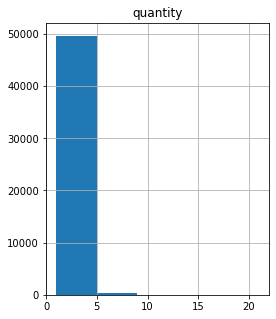

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")

# Median price yang dibayar customer dari masing-masing metode pembayaran. 
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
print(median_price)

# Ubah freight_value menjadi shipping_cost dan cari shipping_cost 
# termahal dari data penjualan tersebut menggunakan sort.
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
print(sort_value)

# Untuk product_category_name, berapa  rata-rata weight produk tersebut 
# dan standar deviasi mana yang terkecil dari weight tersebut, 
mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).mean()
print(mean_value.sort_values())
std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
print(std_value.sort_values())

# Buat histogram quantity penjualan dari dataset tersebutuntuk melihat persebaran quantity 
# penjualan tersebut dengan bins = 5 dan figsize= (4,5)
order_df[["quantity"]].hist(figsize=(4, 5), bins=5)
plt.show()

# Matplotlib

In [4]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')


In [5]:
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


In [6]:
# Menambahkan kolom order_date pada dataset

import datetime

dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

# Penjelasan :                                                                                    
# apply & lambda biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x: x*2) berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja
# Function datetime.datetime.strptime digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
# Function  strftime digunakan untuk mengubah format suatu data bertime datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti outputnya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada.

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


In [7]:
# Menambahkan kolom gmv pada dataset

import datetime

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


In [8]:
# Membuat data agregat

monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


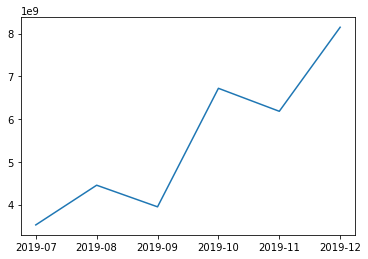

In [9]:
# Membuat Line Chart 

import matplotlib.pyplot as plt

plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

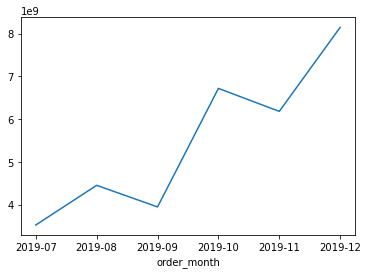

In [10]:
# Membuat Line Chart tanpa variabel baru

dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

Komponen plot :

1. Figure adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.
2. Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut Axes. Sebuah Figure bisa terdiri dari beberapa Axes. 
3. Setiap Axes biasanya memiliki sumbu-X (X-axis) dan sumbu-Y (Y-axis). Masing-masing sumbu memiliki komponen sebagai berikut:
    a. Axis Label: Nama dari sumbu yang ditampilkan.
    b. Tick: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.
    c. Tick Label: Tulisan di tiap tick yang menyatakan nilainya.
4. Untuk isi grafiknya sendiri, bisa berupa line (untuk line plot), atau marker (untuk scatter plot), bisa juga bentuk lain seperti bar (untuk bar plot / histogram).
5. Aksesoris lain yang bisa ditambahkan, di antaranya Grid untuk mempermudah melihat tick yang sejajar, dan Text untuk memberikan informasi tambahan berbentuk teks di grafik.
 
More : https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html.

 

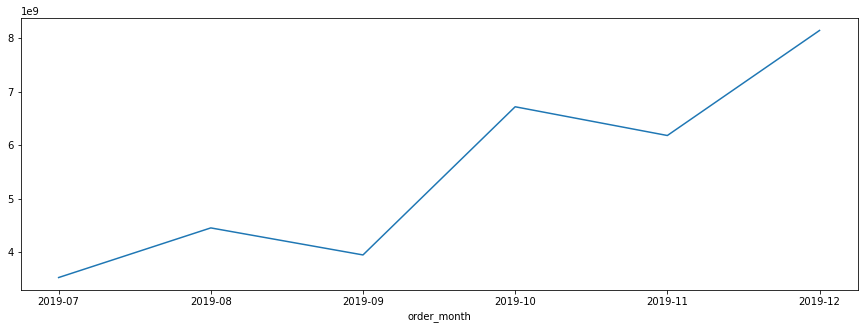

In [11]:
# Mengubah figure size grafik

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

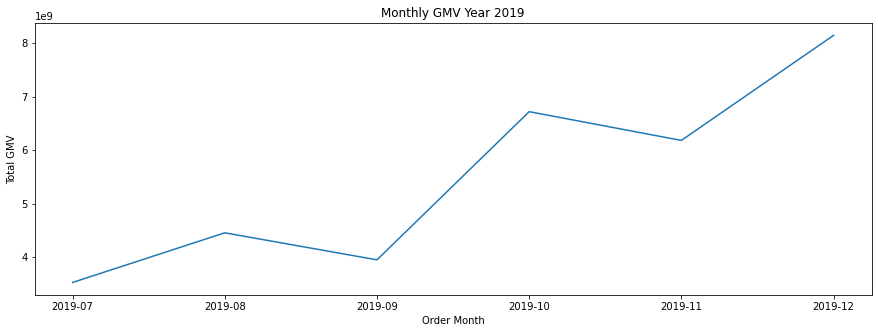

In [13]:
# Menambahkan judul dan label pada plot

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

Text(0, 0.5, 'Total Amount')

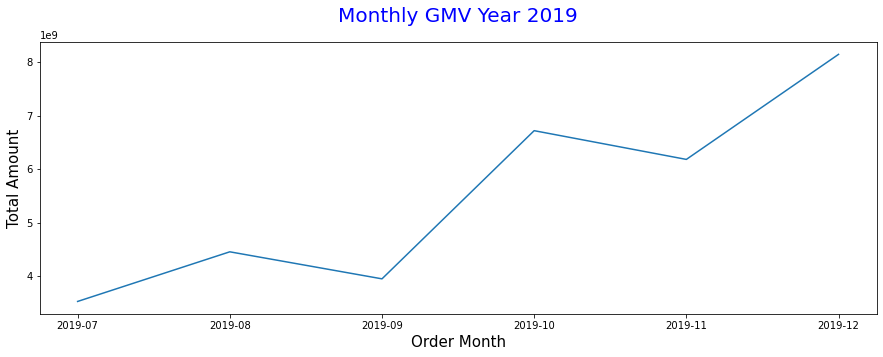

In [14]:
# Konstum judul dan label
# loc: posisi title --> ‘left’ : rata kiri, ‘right’ : rata kanan, ‘center’ : tengah. Defaultnya title ada di tengah.
# pad: jarak antara judul ke grafik (dalam satuan px)
# fontsize: ukuran font/huruf (dalam satuan px).
# color: warna huruf juduL, seperti ‘blue’, ‘red’, ‘orange’, dsb. 
# Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)

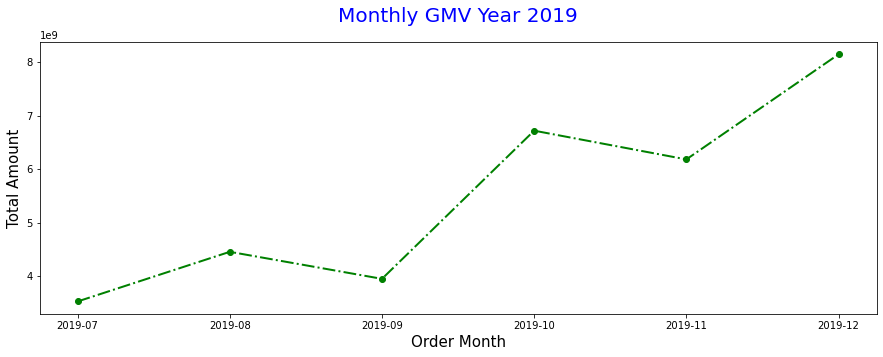

In [15]:
# Kostumisasi Line dan Point
# linewidth: ketebalan line/garisnya (dalam satuan px)
# linestyle: jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' 
# atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' 
# atau ‘dashdot’ untuk garis dan titik bergantian.
# marker: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

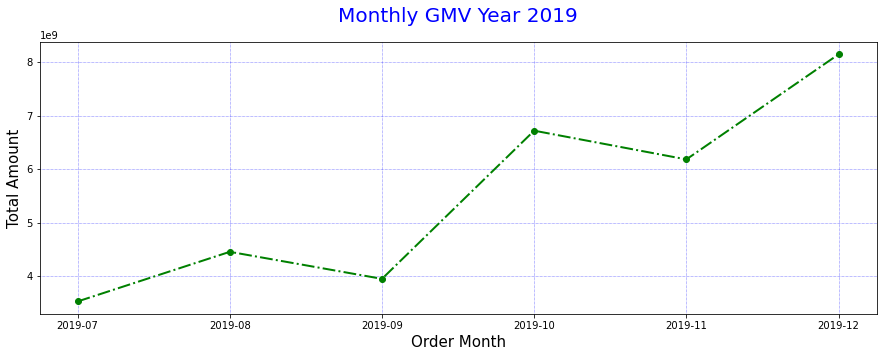

In [18]:
# Menambahkan grid, agar nilai di masing-masing titik bisa mudah dipetakan ke sumbu-y.

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='dashdot', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='blue', linestyle=':', linewidth=0.5)
plt.show()

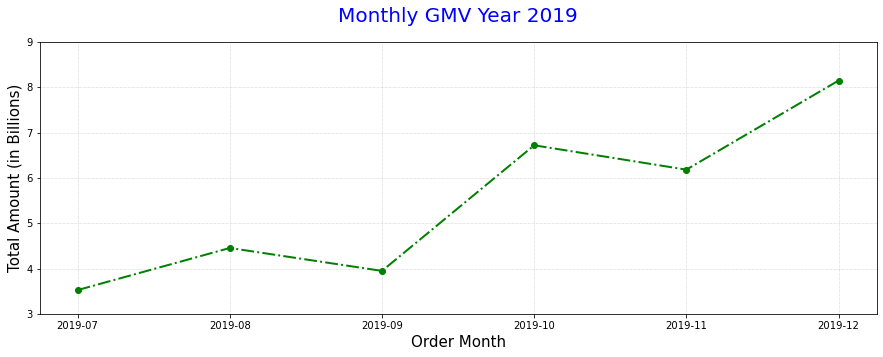

In [19]:
# Kostumisasi Axis Ticks

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()                            # Isi labels adalah List ticks labels di sumbu-y
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

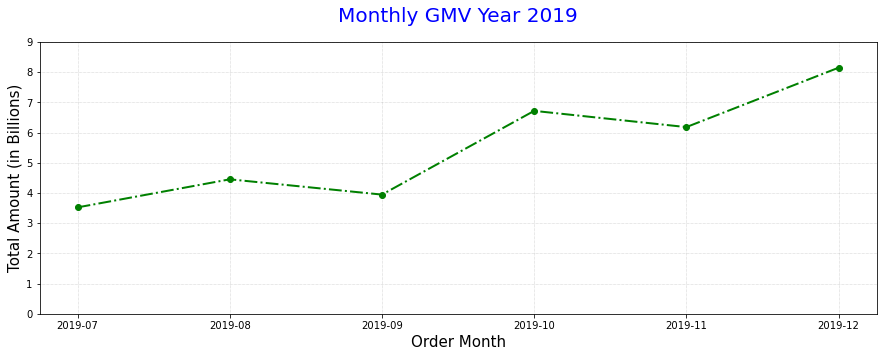

In [20]:
# Menetukan batas minimum axis y

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

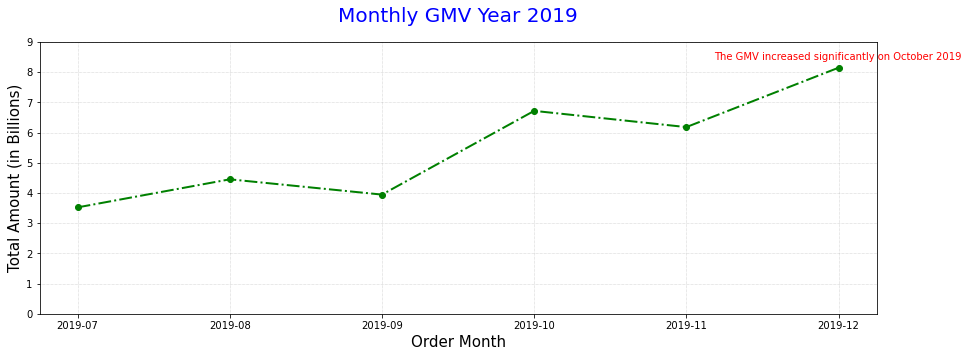

In [27]:
# Menambah informasi pada plot
# Dua angka pertama itu adalah koordinat, x dan y. 
# Saat set transform=fig.transFigure, maka koordinatnya berkisar 0 sampai 1 
# (untuk x dari kanan ke kiri, dan untuk y, dari bawah ke atas).
# Jika parameter transform tidak diisi, maka koordinatnya dalam satuan inch 
# (Dalam contoh ini, dari 0-15 dari kiri ke kanan, dan 0-5 dari bawah ke atas). 
# Seperti halnya title atau label, dimungkinkan juga untuk set warna dan ukuran hurufnya.

fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.75,0.83,'The higest GMV at Desember 2019',transform=fig.transFigure, color='red')
plt.show()

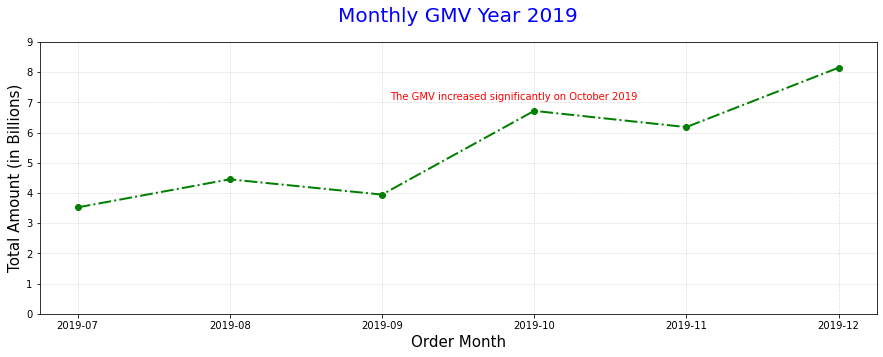

In [28]:
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72,'The GMV increased significantly on October 2019',transform=fig.transFigure, color='red')
plt.show()

In [30]:
# Save plot menjadi png

plt.savefig('monthly_gmv.png')

# Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:
# dpi: Resolusi gambar (dots per inch). 
# quality: Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).
# facecolor: Memberikan warna bagian depan figure, di luar area plot 
# edgecolor: Memberikan warna pinggiran gambar
# transparent: Jika nilainya True, maka gambarnya jadi transparan (jika filenya png)

<Figure size 432x288 with 0 Axes>

# Quiz

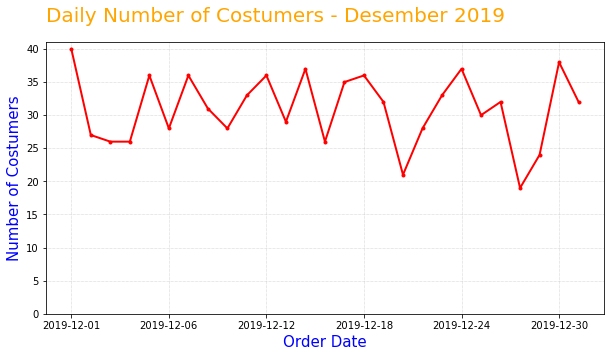

In [34]:
# Buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) 
# selama bulan Desember.
# Beberapa spesifikasi yang harus diperhatikan:
# Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019
# Sumbu-y adalah jumlah unique customers di tiap tanggal

# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Costumers - Desember 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Costumers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()